### Histogram of global and local AI value differences
For each landscape trio, denotes the AI value difference as the sum of the differences between the global and local AI values of the three landscapes in the trio, following the AI values received after the advisor were fed 0, ..., 19 random suggestions. Compares the distributions of AI value differences for basic landscape trios and for the final selected landscape trios.

In [1]:
from common import set_matplotlib_latex, plot_colours, set_axes_length
import matplotlib.pyplot as plt
import json
import numpy as np
set_matplotlib_latex()
from matplotlib.ticker import MultipleLocator

In [2]:
def load_basic_landscapes_trios_scores():
    landscapes_scores = []
    batch_nrs = [i for i in range(0, 10)]
    for batch_nr in batch_nrs:
        with open(f"../outputs/advisor_high_low_comparison_basic_landscapes/{batch_nr}.json", "r", encoding="utf-8") as file:
            landscapes_json = json.load(file)
        for landscape_json in landscapes_json:
            high_rewards = np.array(landscape_json["high_rewards"])
            low_rewards = np.array(landscape_json["low_rewards"])
            landscapes_scores.append(np.mean(high_rewards - low_rewards))
    # add every trio in landscapes_scores
    trios_scores = []
    for i in range(0, len(landscapes_scores), 3):
        trios_scores.append(landscapes_scores[i] + landscapes_scores[i + 1] + landscapes_scores[i + 2])
    return trios_scores

def load_preselected_landscapes_trios_scores():
    trios_scores = []
    with open("../landscapes/landscape_trios_20_with_rewards.json", "r", encoding="utf-8") as file:
        trios_json = json.load(file)
    for trio_json in trios_json:
        high_rewards = np.array(trio_json["high_rewards"])
        low_rewards = np.array(trio_json["low_rewards"])
        trios_scores.append(np.mean(high_rewards - low_rewards))
    return trios_scores

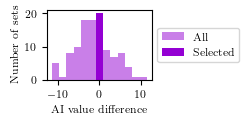

In [3]:
basic_trios_scores = load_basic_landscapes_trios_scores()
preselected_trios_scores = load_preselected_landscapes_trios_scores()

plot_width = 1.05
plot_height = 0.7
max_or_min_difference = max(abs(min(basic_trios_scores)), abs(max(basic_trios_scores)))
bins = np.linspace(-max_or_min_difference, max_or_min_difference, 14)
plt.hist(basic_trios_scores, color=plot_colours["ai"], bins=bins, alpha=0.5, label="All")
plt.hist(preselected_trios_scores, color=plot_colours["ai"],bins=bins, label="Selected")
set_axes_length(plot_width, plot_height)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().yaxis.set_major_locator(MultipleLocator(base=10))
plt.xlabel("AI value difference")
plt.ylabel("Number of sets")
plt.savefig("../figures/advisor_high_low_comparison/advice_reward_difference.pdf", bbox_inches='tight')
plt.show()